In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import yfinance as yfin
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
yfin.pdr_override()
df = web.DataReader('AAPL','2000-01-01','2023-02-06' )
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
2000-01-04 00:00:00-05:00,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2000-01-05 00:00:00-05:00,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
2000-01-06 00:00:00-05:00,0.947545,0.955357,0.848214,0.848214,0.721930,767972800
2000-01-07 00:00:00-05:00,0.861607,0.901786,0.852679,0.888393,0.756127,460734400


In [3]:
df = df.reset_index()  # reset_index() ----> it is used so that we can make date as simple column mot index
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00-05:00,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
1,2000-01-04 00:00:00-05:00,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2,2000-01-05 00:00:00-05:00,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
3,2000-01-06 00:00:00-05:00,0.947545,0.955357,0.848214,0.848214,0.721930,767972800
4,2000-01-07 00:00:00-05:00,0.861607,0.901786,0.852679,0.888393,0.756127,460734400


In [4]:
# dropping the date column and adj close 
df = df.drop(['Date' , 'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


### Plotting the close column on the graph

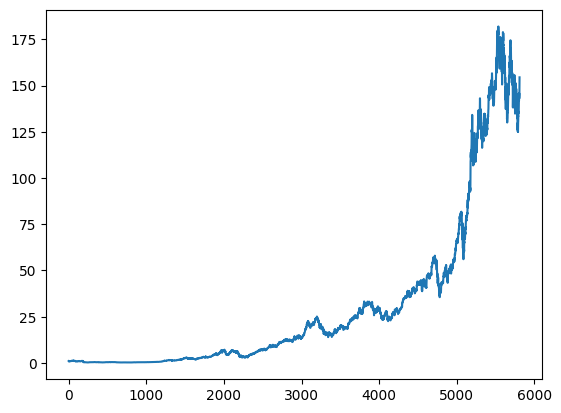

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
5805,144.960007,145.550003,142.850006,143.000000,64015300
5806,142.699997,144.339996,142.279999,144.289993,65874500
5807,143.970001,146.610001,141.320007,145.429993,77663600
5808,148.899994,151.179993,148.169998,150.820007,118339000


In [7]:
# it will take 100 days closing price and then give average
ma100 = df.Close.rolling(100).mean()    # ma100 ---> moving average of first 100 parameters
# so for first 100 days it will be null and start counting from 101
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5805    143.194499
5806    143.077799
5807    142.987499
5808    142.921999
5809    142.832699
Name: Close, Length: 5810, dtype: float64

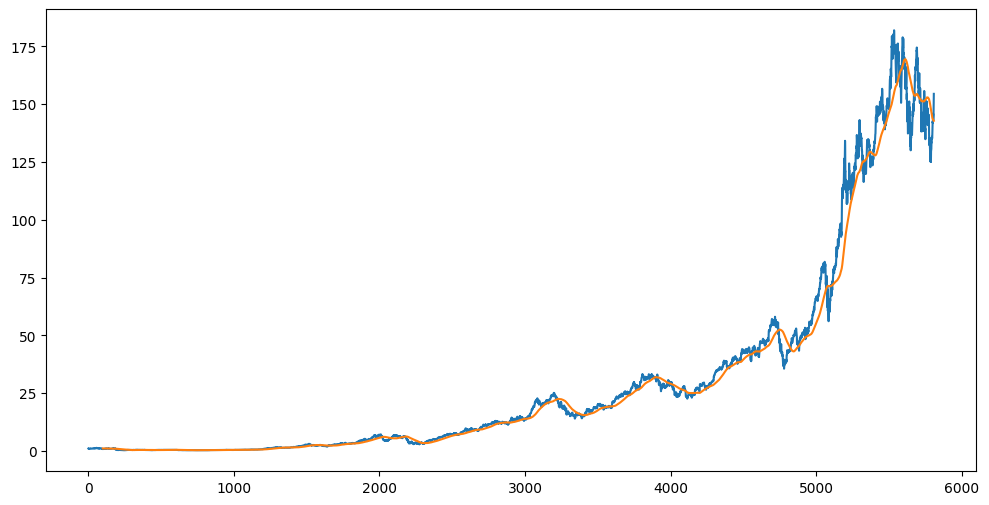

In [8]:
# now plotting the moving average 100 and closing parameter
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [9]:
# moving 200 average . so first 200 values will be null
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5805    148.16735
5806    148.03680
5807    147.93750
5808    147.86625
5809    147.80175
Name: Close, Length: 5810, dtype: float64

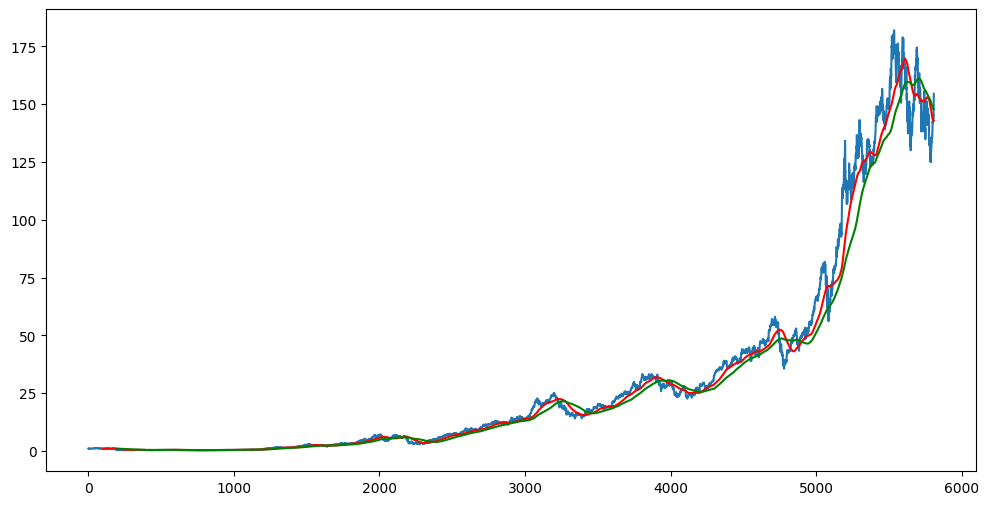

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape  # we have rows -->(5810)
# col --->(5)

(5810, 5)

## <font color='red'> SPLITTING DATA FOR TRAINING AND TESTING </FONT>

In [12]:
# splitting data for training and testing

# 70% data for training and 30% data for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) 

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


# printing the shape of data

print(data_training.shape)
print(data_testing.shape)

(4066, 1)
(1744, 1)


## <font color='red'>SCALING THE DATA FOR TRAINING THE DATA</font>

In [13]:
from sklearn.preprocessing import MinMaxScaler
# feature_range=(0,1)  ---> means all the values of the column of the scaler will be scaled down between 1 and 0
scaler  = MinMaxScaler(feature_range=(0,1))


In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.72505518],
       [0.75413222],
       [0.7557981 ]])

In [15]:
x_train = []
y_train = []

# appending our stock prices in the training data

# for i in range (100,data_training_array.shape[0]): ----> the value of 101 index of (close) will depend on
#  100 previous values

for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


# now we have to convert it into numpy array so that we can pass it to the LSTM
x_train , y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train.shape

(3966, 100, 1)

## <font color='green'>APPLYING THE MACHINE LEARNING ALGORITHM</font>

In [17]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

ImportError: cannot import name 'type_spec_registry' from 'tensorflow.python.framework' (c:\Users\Ankur\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\__init__.py)

In [ ]:
# Now we are creating the model
model =  Sequential() # getting the sequential model

# Now adding the LSTM layers
# x_train.shape[1],1------> this represents the no of columns suppose we are making it for only (Close) column

# layer-1
model.add(LSTM(units=50 , activation='relu',return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# Layer-2
model.add(LSTM(units=60 , activation='relu',return_sequences=True))
model.add(Dropout(0.3))

# Layer-3
model.add(LSTM(units=80 , activation='relu',return_sequences=True))
model.add(Dropout(0.4))

# Layer-4
model.add(LSTM(units=120 , activation='relu'))
model.add(Dropout(0.5))



# Now we are connecting all the layers
model.add(Dense(units=1))    # units=1 ----. because we have to predict only one column-----> (Close) column

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

## <font color='red'>compiling our model</font>

In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
124/124 [==============================] - 40s 289ms/step - loss: 0.0171
Epoch 2/50
124/124 [==============================] - 36s 293ms/step - loss: 0.0045
Epoch 3/50
124/124 [==============================] - 40s 319ms/step - loss: 0.0042
Epoch 4/50
124/124 [==============================] - 50s 402ms/step - loss: 0.0038
Epoch 5/50
124/124 [==============================] - 44s 354ms/step - loss: 0.0034
Epoch 6/50
124/124 [==============================] - 42s 336ms/step - loss: 0.0032
Epoch 7/50
124/124 [==============================] - 38s 304ms/step - loss: 0.0033
Epoch 8/50
124/124 [==============================] - 37s 298ms/step - loss: 0.0031
Epoch 9/50
124/124 [==============================] - 37s 298ms/step - loss: 0.0030
Epoch 10/50
124/124 [==============================] - 37s 300ms/step - loss: 0.0032
Epoch 11/50
124/124 [==============================] - 34s 276ms/step - loss: 0.0028
Epoch 12/50
124/124 [==============================] - 34s 272ms/step - lo

### <font color='red'> saving the model so that we can save it to the web application</font>

In [ ]:
model.save("keras_model.h5")

### Testing the data

In [ ]:
data_testing.head()

,Close
4066,25.375000
4067,25.752501
4068,25.467501
4069,25.257500
4070,25.280001


In [ ]:
data_training.tail(100)

,Close
3966,27.375000
3967,28.030001
3968,27.900000
3969,27.947500
3970,27.552500
...,...
4061,24.190001
4062,24.227501
4063,24.172501
4064,25.132500


In [ ]:
# TO PREDICT VALUE FOR 4066 INDEX WE NEED PREVIOUS 100 INDEX WHICH IS IN THE TAIL OF
# data_training.tail(100)

past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index = True)

C:\Users\Ankur\AppData\Local\Temp\ipykernel_11676\3119481377.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [ ]:
final_df.head()
# Again we have to perform scaling 

,Close
0,27.375000
1,28.030001
2,27.900000
3,27.947500
4,27.552500


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03004548],
       [0.034154  ],
       [0.03333856],
       ...,
       [0.7705504 ],
       [0.80435949],
       [0.8274424 ]])

In [ ]:
input_data.shape

(1844, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test) , np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(1744, 100, 1)
(1744,)


In [ ]:
# Making predictions
y_predict = model.predict(x_test)

55/55 [==============================] - 2s 34ms/step


In [ ]:
y_predict

array([[0.06335774],
       [0.06325262],
       [0.06320731],
       ...,
       [0.7460361 ],
       [0.7533068 ],
       [0.76054925]], dtype=float32)

In [ ]:
y_test

array([0.0175004 , 0.01986829, 0.01808061, ..., 0.7705504 , 0.80435949,
       0.8274424 ])

In [ ]:
# Again we have to scale down our value
# our data is divide by this value ---> 0.00627254

scaler.scale_

array([0.00627254])

In [ ]:
scale_factor = 1/0.00627254

y_predict = y_predict*scale_factor
y_test = y_test*scale_factor

## <font color = 'green'>plotting our real values</font>

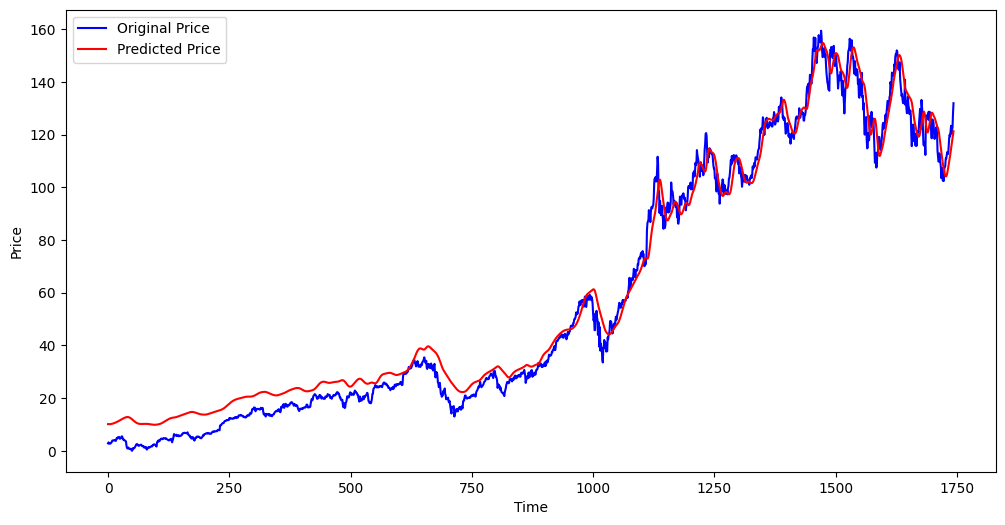

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = "Original Price")
plt.plot(y_predict , 'r' , label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

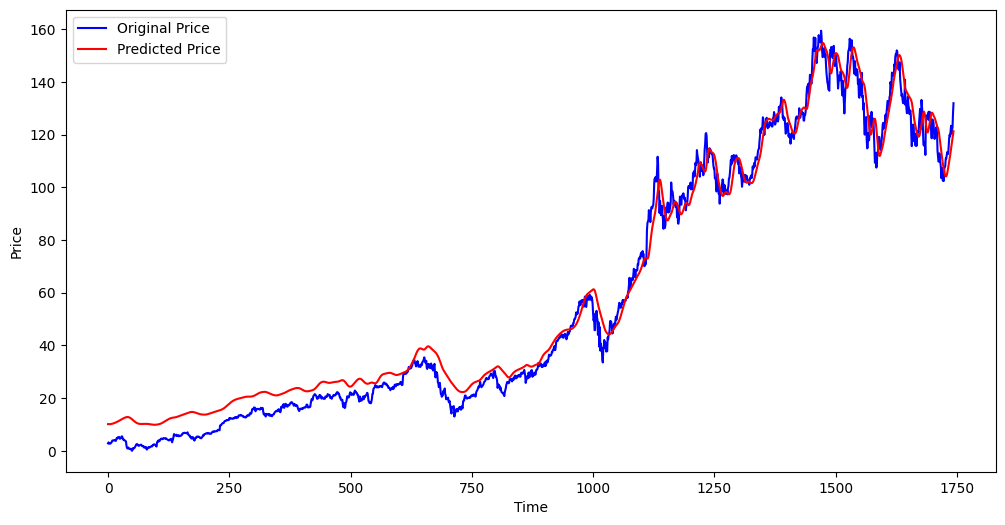

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = "Original Price")
plt.plot(y_predict , 'r' , label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()